# Análise de jogos do Corinthians na Arena

Olá! 

Esse é o meu primeiro projeto demonstrativo de Python. Nele, tomei o cuidado de buscar um DataSet em que ainda não houvesse um code público para que o trabalho não estivesse enviesado, escolhi um tema relacionado a futebol por ser de fácil entendimento para muitos brasileiros.

Nessa análise tento demonstrar conceitos de limpeza e organização de dados, como formatação para dot notation, set de datas e etc, incluindo a observação de uma inconsistência que só foi possível identificar em meio à análise gráfica.

Demonstro também um conceito simples de Machine Learning, a regressão linear, além de encontrar respostas para algumas respotas por meio da análise do DataSet.

Fonte: https://www.kaggle.com/datasets/danilosoares/arena-corinthians

# Arrumando e organizando os dados:

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm

In [78]:
#leitura de dados
cr = pd.read_csv('C:\\Projetos\\dados\\Jogos.csv', encoding='latin-1')

In [79]:
cr.shape

(260, 39)

In [80]:
cr.head()

,JOGO,RESULTADO,CORINTHIANS,GOL COR,GOL VIS,VISITANTE,CIDADE - VISITANTE,UF,PAIS,DIA,...,GOL-NORTE,GOL VIS-SUL,GOL VIS-NORTE,GOL-1T,GOL-2T,GOL VIS-1T,GOL VIS-2T,ARBITRO,UF-ARBITRO,VAR
0,1,D,CORINTHIANS,0,1,FIGUEIRENSE,FLORIANOPOLIS,SC,BRA,18,...,0,0,1,0,0,0,1,JAILSON MACEDO DE FREITAS,BA,NAO
1,2,E,CORINTHIANS,1,1,BOTAFOGO,RIO DE JANEIRO,RJ,BRA,1,...,1,0,1,1,0,0,1,LEANDRO PEDRO VUADEN,RS,NAO
2,3,V,CORINTHIANS,2,1,INTERNACIONAL,PORTO ALEGRE,RS,BRA,17,...,0,1,0,2,0,0,1,WAGNER REWAY,MT,NAO
3,4,V,CORINTHIANS,3,0,BAHIA,SALVADOR,BA,BRA,23,...,1,0,0,2,1,0,0,IGOR JUNIO BENEVENUTO,MG,NAO
4,5,V,CORINTHIANS,2,0,PALMEIRAS,SAO PAULO,SP,BRA,27,...,2,0,0,0,2,0,0,SANDRO MEIRA RICCI,PE,NAO


In [81]:
#arrumando o nome das colunas e trazendo os dados todos para minúsculo, para facilitar a dot notation e análise dos dados:
cr.columns = cr.columns.str.lower()
cr.columns = cr.columns.str.replace('-','_')
cr.columns = cr.columns.str.replace(' ','_')
cr.columns = cr.columns.str.replace('___','_')
for coluna in cr.columns:
    if cr[coluna].dtypes == 'object':
        cr[coluna] = cr[coluna].str.lower()

In [82]:
#Convertendo tipos: deixando renda e publico no formato numérico padrão:
cr.renda = cr.renda.str.replace('.','', regex = False)
cr.renda = cr.renda.str.replace(',','.', regex = False)
cr.renda = cr.renda.astype('float')
cr.publico = cr.publico.astype('str')
cr.publico = cr.publico.str.replace('.','', regex = False)
cr.publico = cr.publico.astype('int')

In [83]:
#criando uma coluna de data a partir das colunas 'mes','dia','ano':
datado = cr.loc[:, ['dia','mes','ano']].astype(str)
datado['data'] = datado.mes + '-' + datado.dia + '-' + datado.ano
datado.data = pd.to_datetime(datado.data)
cr['data'] = datado['data']
cr.head()

,jogo,resultado,corinthians,gol_cor,gol_vis,visitante,cidade_visitante,uf,pais,dia,...,gol_vis_sul,gol_vis_norte,gol_1t,gol_2t,gol_vis_1t,gol_vis_2t,arbitro,uf_arbitro,var,data
0,1,d,corinthians,0,1,figueirense,florianopolis,sc,bra,18,...,0,1,0,0,0,1,jailson macedo de freitas,ba,nao,2014-05-18
1,2,e,corinthians,1,1,botafogo,rio de janeiro,rj,bra,1,...,0,1,1,0,0,1,leandro pedro vuaden,rs,nao,2014-06-01
2,3,v,corinthians,2,1,internacional,porto alegre,rs,bra,17,...,1,0,2,0,0,1,wagner reway,mt,nao,2014-07-17
3,4,v,corinthians,3,0,bahia,salvador,ba,bra,23,...,0,0,2,1,0,0,igor junio benevenuto,mg,nao,2014-07-23
4,5,v,corinthians,2,0,palmeiras,sao paulo,sp,bra,27,...,0,0,0,2,0,0,sandro meira ricci,pe,nao,2014-07-27


In [84]:
#criando um dataframe com as colunas importantes para análise da renda (cr2), excluindo jogos no período de pandemia, onde a renda foi R$ 0,00:
cr2 = cr.loc[:,['resultado','corinthians','gol_cor','gol_vis','visitante','pais','dia_semana','campeonato','publico','renda','dia','mes','ano','data']] [cr.renda != 0]

# Analises sobre público e renda:

In [85]:
cr2.head()

,resultado,corinthians,gol_cor,gol_vis,visitante,pais,dia_semana,campeonato,publico,renda,dia,mes,ano,data
0,d,corinthians,0,1,figueirense,bra,domingo,brasileiro,36123,3029801.7,18,5,14,2014-05-18
1,e,corinthians,1,1,botafogo,bra,domingo,brasileiro,37119,2616819.5,1,6,14,2014-06-01
2,v,corinthians,2,1,internacional,bra,quinta,brasileiro,32644,2556385.5,17,7,14,2014-07-17
3,v,corinthians,3,0,bahia,bra,quarta,copa do brasil,24252,1389973.5,23,7,14,2014-07-23
4,v,corinthians,2,0,palmeiras,bra,domingo,brasileiro,31031,2206184.0,27,7,14,2014-07-27


<AxesSubplot:xlabel='renda', ylabel='Count'>

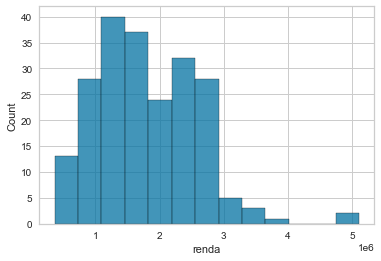

In [86]:
sb.histplot(cr2.renda)

A maior parte das ocorrências de renda em jogos na Neo Química arena está entre 1.5 e 3 milhões, há alguns valores anormais abaixo do padrão pois mesmo desconsiderando os jogos
que tiveram renda nula por conta da pandemia, ainda houveram jogos em que apenas parte do estádio estava liberada ao público. Há alguns outliers à direita, estes são jogos em finais mata-mata, onde os preços foram superiores aos praticados normalmente.

In [87]:
cr2.sort_values('renda', ascending = True).head(10)

,resultado,corinthians,gol_cor,gol_vis,visitante,pais,dia_semana,campeonato,publico,renda,dia,mes,ano,data
87,v,corinthians,1,0,ferroviaria (araraquara),bra,quarta,amistoso,21956,365603.0,1,2,17,2017-02-01
94,v,corinthians,3,1,linense,bra,quarta,paulista,12159,471297.9,29,3,17,2017-03-29
89,v,corinthians,1,0,novorizontino (gn),bra,quarta,paulista,11708,473376.1,15,2,17,2017-02-15
138,e,corinthians,2,2,cruzeiro,bra,quarta,amistoso,3683,504421.8,11,7,18,2018-07-11
246,v,corinthians,3,1,bahia,bra,terca,brasileiro,10624,520529.9,5,10,21,2021-10-05
121,d,corinthians,0,1,sao bento (sorocaba),bra,quarta,paulista,14493,603122.9,14,2,18,2018-02-14
247,v,corinthians,1,0,fluminense,bra,quarta,brasileiro,12045,604926.6,13,10,21,2021-10-13
123,v,corinthians,1,0,mirassol,bra,quarta,paulista,15144,611717.5,7,3,18,2018-03-07
192,v,corinthians,3,0,avai,bra,quarta,brasileiro,17441,617881.2,27,11,19,2019-11-27
137,v,corinthians,2,1,gremio,bra,domingo,amistoso,27418,659436.9,8,7,18,2018-07-08


Podemos verificar que entre os jogos de menor renda do corinthians, temos alguns amistosos, jogos com times de menor expressão em campeonatos oficiais e também
jogos no começo da reabertura pós-pandemia (05/10/2021), pela liberação de uma parte menor do estádio pelas autoridades sanitárias e provavelmente também pelo receio da população.

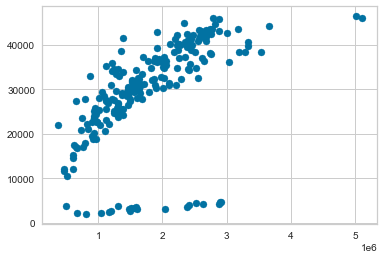

In [88]:
plt.scatter(cr2.renda, cr2.publico)

Identificada uma possível inconsistência nos dados.
Pelo gráfico de dispersão, temos alguns jogos com o público bem abaixo da média sem grande influência na renda.

# Análise de possível inconsistência Público x Renda:

In [89]:
cr2.loc[cr2.publico < 10000].sort_values('publico',ascending=False).head()

,resultado,corinthians,gol_cor,gol_vis,visitante,pais,dia_semana,campeonato,publico,renda,dia,mes,ano,data
117,v,corinthians,3,2,palmeiras,bra,domingo,brasileiro,4609,2908847.1,5,11,17,2017-11-05
120,e,corinthians,2,2,atletico mg,bra,domingo,brasileiro,4603,2892594.2,26,11,17,2017-11-26
253,e,corinthians,1,1,gremio,bra,domingo,brasileiro,4398,2517739.0,5,12,21,2021-12-05
183,e,corinthians,2,2,ceara,bra,sabado,brasileiro,4323,2888967.3,7,9,19,2019-09-07
64,v,corinthians,6,0,cobresal,chi,quarta,libertadores,4171,2635754.5,20,4,16,2016-04-20


In [90]:
cr2.loc[cr2.publico < 10000].sort_values('publico',ascending=False).head().shape

(5, 14)

Entre esses jogos com público abaixo do padrão sem influência na renda, existem clássicos e também jogos de campeonatos internacionais, os quais geralmente têm uma média de público até superior à vista normalmente.<br> Também não há um padrão de datas que possa coincidir com as restrições do período pandêmico.<br>
Pesquisando sobre os 3 primeiros jogos da tabela acima, pude verificar que faltou um zero à direita do público pagante, provavelmente por um erro no processamento dos dados.<br>
Fontes:<br>
Índice 117: https://www.uol.com.br/esporte/futebol/campeonatos/brasileiro/serie-a/ultimas-noticias/2017/11/05/corinthians-x-palmeiras.htm<br>
Índice 120: http://ge.globo.com/sp/futebol/brasileirao-serie-a/jogo/26-11-2017/corinthians-atletico-mg/<br>
Índice 253: https://www.meutimao.com.br/jogo/5938/brasileirao_2021/corinthians-1-x-1-gremio<br>

In [91]:
# Para consertar os dados, vou adicionar o zero faltante a esses jogos com erro na coluna "publico':
recomp = cr2.loc[cr2.publico < 10000].sort_values('publico',ascending=False)
recomp.publico = recomp.publico.astype(str)
recomp.publico = recomp.publico + '0'
recomp.publico = recomp.publico.astype(int)
recomp.head()

,resultado,corinthians,gol_cor,gol_vis,visitante,pais,dia_semana,campeonato,publico,renda,dia,mes,ano,data
117,v,corinthians,3,2,palmeiras,bra,domingo,brasileiro,46090,2908847.1,5,11,17,2017-11-05
120,e,corinthians,2,2,atletico mg,bra,domingo,brasileiro,46030,2892594.2,26,11,17,2017-11-26
253,e,corinthians,1,1,gremio,bra,domingo,brasileiro,43980,2517739.0,5,12,21,2021-12-05
183,e,corinthians,2,2,ceara,bra,sabado,brasileiro,43230,2888967.3,7,9,19,2019-09-07
64,v,corinthians,6,0,cobresal,chi,quarta,libertadores,41710,2635754.5,20,4,16,2016-04-20


In [92]:
#repassando os valores para os Dataframes principais:
cr.loc[recomp.index,'publico'] = recomp.publico
cr2.loc[recomp.index,'publico'] = recomp.publico

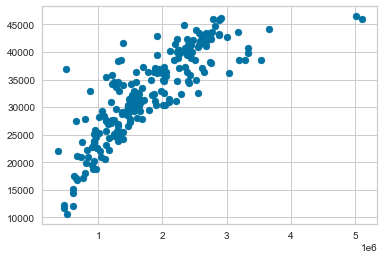

In [93]:
plt.scatter(cr2.renda, cr2.publico)

As inconsistências de renda foram encontradas e não mais estão no Dataframe. 

# Algumas respostas:

In [94]:
# Quais os times que mais jogaram com o Corinthians na Arena?
cr.groupby('visitante').count().loc[:,['jogo']].sort_values('jogo', ascending = False).head(10)

,jogo
visitante,
palmeiras,16
santos,16
sao paulo,15
fluminense,10
gremio,9
ponte preta,9
atletico mg,9
flamengo,9
chapecoense,8


In [95]:
# Quantas partidas de cada campeonato foram jogadas na Arena?
por_campeonato = cr.loc[:,['campeonato','jogo']].groupby('campeonato').count()
por_campeonato.sort_values('jogo', ascending = False)

,jogo
campeonato,
brasileiro,146
paulista,66
copa do brasil,18
libertadores,14
sulamericana,11
amistoso,5


In [96]:
# Quantos clássicos foram jogados na Arena?
classicos = cr.loc[:, ['visitante','jogo']][(cr.visitante == 'santos') | (cr.visitante == 'palmeiras') | (cr.visitante == 'sao paulo')]
classicos.groupby('visitante').count()

,jogo
visitante,
palmeiras,16
santos,16
sao paulo,15


# Regressão linear:

Criação de um modelo de regressão linear simples para previsão do valor padrão de arrecadação caso a Neo Química Arena comportasse 70000 pessoas.


In [97]:
x = cr2.renda.values
y = cr2.publico.values

In [98]:
#temos uma boa correlação, isso significa que um modelo de regressão linear pode funcionar com essas variáveis
np.corrcoef(x,y)

array([[1.        , 0.83766285],
       [0.83766285, 1.        ]])

In [99]:
y = y.reshape(-1,1)

In [100]:
modelo = LinearRegression()

In [101]:
modelo.fit(y,x)

LinearRegression()

In [102]:
modelo.intercept_

-863007.1435414506

In [103]:
# O modelo entende que a cada 1 pessoa a mais no público, a renda sobe R$ 81.81
modelo.coef_

array([81.81157703])

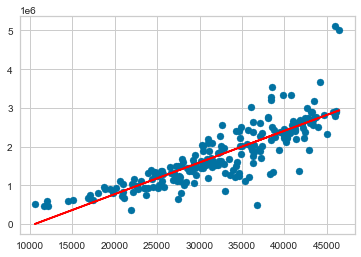

In [108]:
plt.scatter(y,x)
plt.plot(y,modelo.predict(y), color = 'red')

In [105]:
modelo.predict([[70000]])

array([4863803.24833724])

In [106]:
modelo.score(y,x)

0.701679050682511

O modelo prevê que caso o estádio comportasse 70 mil pessoas, a arrecadação de acordo com o que foi entendido da média de preços praticada na maioria dos jogos seria em média de R$ 4863803,00.<br>

Algumas considerações:<br>
-Pelo Score, esse modelo é capaz de prever 70&#37; da renda com base na variável explanatória de público;<br>
-Pela diferença grande entre as escalas de público e renda, o que torna a intersecção muito baixa, o modelo não funciona bem para prever a arrecadação com médias de público abaixo do padrão;<br>
-A arrecadação poderia variar também de acordo com os preços praticados nos novos setores, visto que a variação na faixa de preços de ingressos é bastante considerável, indo de 35 reais até mais de 500.